###Step 1: Import the libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###Step 2: Load the dataset

In [15]:
data = pd.read_csv('/content/car data.csv')
print(data.head())
print(data.tail())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5 

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


###Step 3: Cleaning the data

In [17]:
#We drop the columns we dont need for example: car name
#Create a new feature "car_age" instead of "Year"

data=data.drop(['Car_Name'], axis=1) #drop car name cause its not useful

#create new column 'Car_Age'
data['Car_Age'] = 2025 - data['Year']
data = data.drop(['Year'], axis=1)

#convert categorical to numeric
data = pd.get_dummies(data, drop_first=True)

print(data.head())

   Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11             False   
1           4.75           9.54       43000      0       12              True   
2           7.25           9.85        6900      0        8             False   
3           2.85           4.15        5200      0       14             False   
4           4.60           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  


###Step 4: Choose features and target

In [19]:
x=data.drop(['Selling_Price'], axis=1) #everything except the target is a feature
y=data['Selling_Price'] #this is the target

###Step 5: Train/test split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

###Step 6: Train the linear regression model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

###Step 7:Evaluate the model

In [28]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.8488707839193155
Mean Squared Error: 3.4813498305118165


###Step 8: Visualization

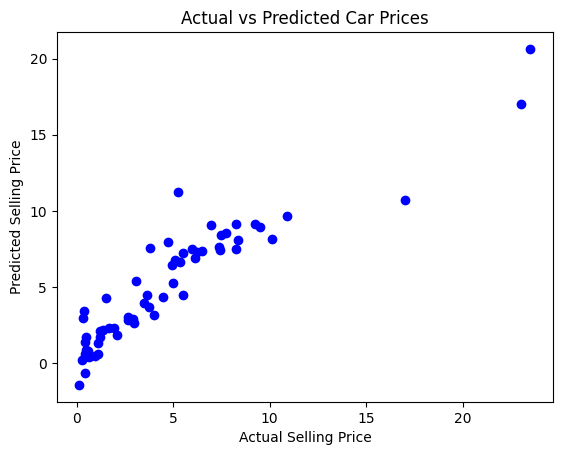

In [29]:
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

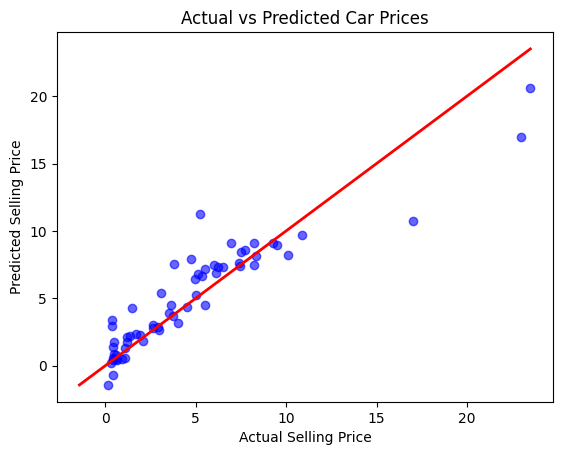

In [30]:
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")

# Add perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linewidth=2)

plt.show()


###Step 9: Predict for a new car

In [32]:
new_car = pd.DataFrame([[8.5, 30000, 1, 5, 1, 0, 0, 1]],
                       columns=x.columns)

predicted_price = model.predict(new_car)
print("Predicted Car Selling Price:", predicted_price[0])

Predicted Car Selling Price: 8.173775043396454


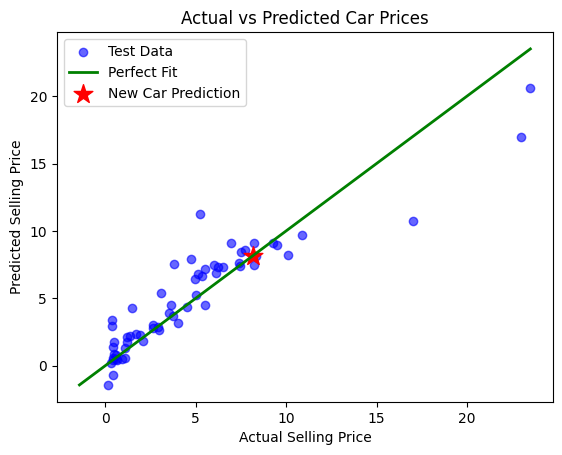

In [33]:
# Scatter of test set
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Test Data")

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="green", linewidth=2, label="Perfect Fit")

# Add new car prediction
# For visualization, we plot (Actual=?, Predicted=?). Since actual unknown, we just show Predicted vs Predicted.
plt.scatter(predicted_price, predicted_price, color="red", marker="*", s=200, label="New Car Prediction")

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()
